In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the data
climate_data = pd.read_csv('Austin_2009_2018.csv')
climate_data = climate_data[climate_data['SOURCE'] == 7]

/var/folders/9p/t6ljp_1516q16t2lqgyjw0w80000gp/T/ipykernel_91455/3174491869.py:1: DtypeWarning: Columns (35,36,42,43,44,47,50,52,72,74,76,77,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  climate_data = pd.read_csv('Austin_2009_2018.csv')


In [23]:
# Extract the temperature and relative humidity
temperature = climate_data['HourlyDryBulbTemperature'].values
relative_humidity = climate_data['HourlyRelativeHumidity'].values
print(temperature[0], len(temperature))

44 110802


In [24]:
# convert the temperature from Fahrenheit to Celsius
def fahrenheit_to_celsius(temperature):
    print(temperature)
    return (temperature - 32) * 5 / 9

In [ ]:
# convert the temperature from Fahrenheit to Celsius
temperature_celsius = np.zeros(len(temperature))
for i in range(len(temperature)):
    try:
        temperature_celsius[i] = fahrenheit_to_celsius(float(temperature[i]))
    except:
        print(temperature[i])
        temperature_celsius[i] = temperature_celsius[i-1]

44.0
44.0
43.0
45.0
42.0
39.0
39.0
39.0
47.0
52.0
56.0
61.0
63.0
64.0
66.0
67.0
68.0
67.0
66.0
64.0
61.0
61.0
57.0
56.0
54.0
53.0
52.0
50.0
50.0
49.0
49.0
48.0
49.0
48.0
51.0
59.0
65.0
67.0
72.0
74.0
73.0
72.0
69.0
68.0
66.0
64.0
63.0
62.0
62.0
63.0
63.0
63.0
64.0
64.0
65.0
65.0
66.0
66.0
64.0
66.0
64.0
65.0
64.0
65.0
64.0
64.0
65.0
66.0
66.0
70.0
70.0
77.0
79.0
81.0
82.0
82.0
81.0
80.0
76.0
74.0
72.0
70.0
68.0
68.0
66.0
65.0
63.0
63.0
63.0
64.0
64.0
64.0
64.0
63.0
63.0
63.0
62.0
63.0
63.0
63.0
61.0
54.0
52.0
48.0
46.0
44.0
44.0
43.0
45.0
44.0
46.0
48.0
48.0
48.0
48.0
48.0
48.0
47.0
45.0
45.0
43.0
43.0
42.0
40.0
38.0
37.0
36.0
35.0
35.0
35.0
35.0
35.0
36.0
35.0
36.0
37.0
37.0
38.0
37.0
37.0
37.0
38.0
37.0
38.0
38.0
38.0
39.0
39.0
39.0
39.0
40.0
40.0
41.0
40.0
39.0
39.0
40.0
39.0
39.0
40.0
40.0
39.0
39.0
41.0
41.0
41.0
41.0
42.0
43.0
43.0
43.0
43.0
42.0
43.0
43.0
43.0
43.0
45.0
49.0
50.0
54.0
55.0
61.0
65.0
65.0
66.0
66.0
63.0
61.0
59.0
57.0
54.0
51.0
49.0
44.0
41.0
38.0
38.0
37.0
39.0


43.888888888888886


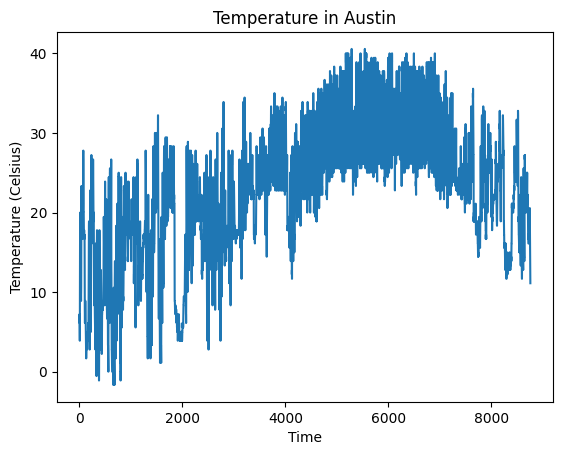

In [26]:

# plot the temperature
plt.figure()
plt.plot(temperature_celsius[0:8760])
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature in Austin')
plt.show()

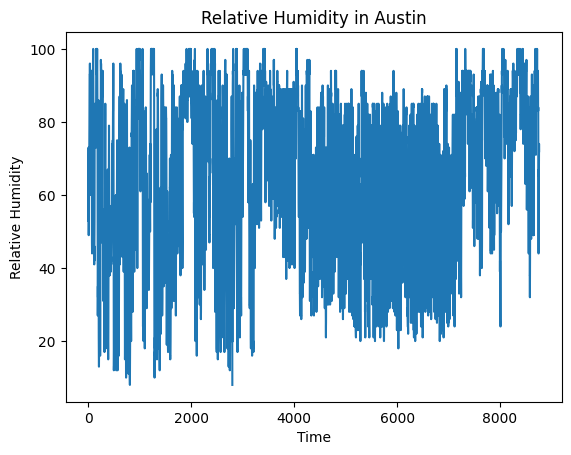

In [27]:
# plot the relative humidity
plt.figure()
plt.plot(relative_humidity[0:8760])
plt.xlabel('Time')
plt.ylabel('Relative Humidity')
plt.title('Relative Humidity in Austin')
plt.show()


In [28]:
import import_ipynb
from PUE_simulation_tool import PUE_AE_Chiller
from PUE_simulation_tool import PUE_WEC_Chiller
from PUE_simulation_tool import PUE_WES_Chiller

In [29]:
### define operational parameters
### The recommended uncertain range of the parameters are summarized in Table A.1. Model input values and ranges in the Energy paper: https://doi.org/10.1016/j.energy.2020.117556

# Here is one possible combination of operational parameters
parameters_AE = [ 9.80302734e-01,
        5.60546875e-03,  1.81445313e-03,  1.03671875e+01,  3.41953125e+01,
       -1.04970703e+01,  1.58320312e+01,  9.01953125e-02,  6.76464844e-01,
        1.47840712e+01,  6.91894531e+00,  4.28710938e+00,  6.85058594e+02,
        8.29931641e-01,  2.03417969e+02,  8.97802734e-01,  7.31582031e+06,
        7.04492187e-01,  1.46519937e+05,  7.90039062e-01,  2.12001820e+05,
        7.16601562e-01,  6.33818359e+00,  2.24023438e-01,  1.05488281e-01,
        1.11914062e+00]
len(parameters_AE)

26

PUE = PUE_AE_Chiller(parameters_AE,20,40,101325,1)

In [30]:
simulation_legenth = 8760
PUE = np.zeros(simulation_legenth)
for i in range(simulation_legenth):
    PUE[i] = PUE_AE_Chiller(parameters_AE, temperature_celsius[i], relative_humidity[i], 101325, 1)

/Users/yifuding/opt/anaconda3/envs/rio_tinto/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [31]:
print(temperature_celsius[0:8760])

[ 6.66666667  6.66666667  6.11111111 ... 12.77777778 11.66666667
 11.11111111]


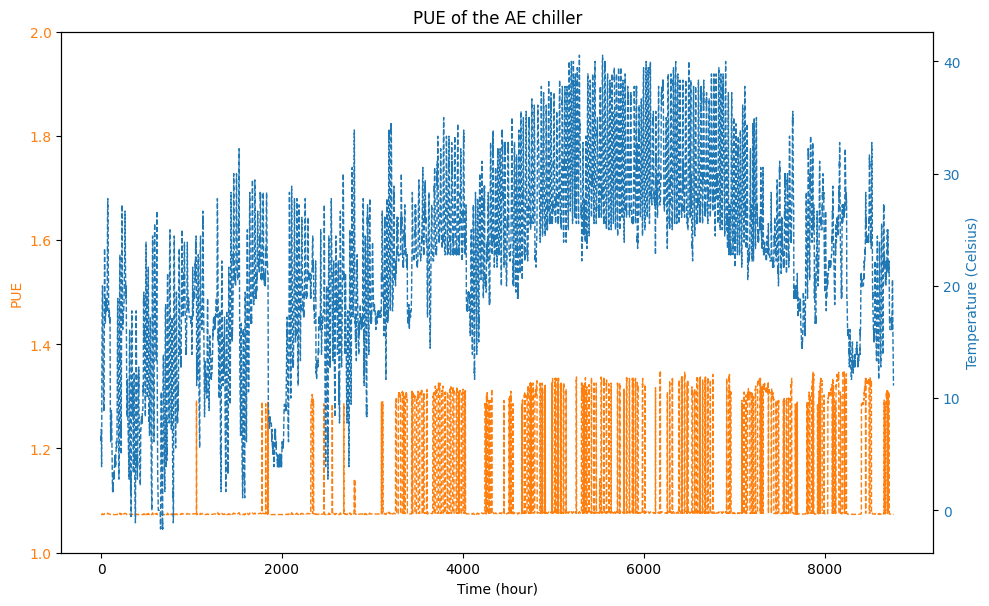

In [32]:

# plot another axis for the temperature
fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'tab:orange'
ax1.set_xlabel('Time (hour)')
ax1.set_ylabel('PUE', color=color)
ax1.plot(PUE, color=color, linestyle='--', linewidth=1)
ax1.set_ylim([1, 2])
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature (Celsius)', color=color)
ax2.plot(temperature_celsius[0:8760], color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('PUE of the AE chiller')
plt.savefig('PUE_AE_chiller_with_temperature.png')



In [33]:
### define operational parameters
### The recommended uncertain range of the parameters are summarized in Table A.1. Model input values and ranges in the Energy paper: https://doi.org/10.1016/j.energy.2020.117556

# Here is one possible combination of operational parameters
parameters_WEC = [ 9.80302734e-01,
       5.60546875e-03, 1.81445313e-03, 2.73671875e+01, 1.88856337e+01,
       7.50488281e+00, 4.13867188e+00, 4.16992188e+02, 7.13720703e-01,
       1.48339844e+02, 7.45947266e-01, 6.50097656e+06, 6.74023438e-01,
       1.56284191e+05, 6.68945312e-01, 1.71884552e+05, 7.45117188e-01,
       2.10534680e+05, 7.09960938e-01, 6.50576172e+00, 2.29404297e+00,
       8.16601563e-01, 9.86289063e-01, 2.24023438e-01, 1.05488281e-01,
       1.11914062e+00]
len(parameters_WEC)

26

In [34]:
simulation_legenth = 8760
PUE_WEC = np.zeros(simulation_legenth)
for i in range(simulation_legenth):
    PUE_WEC[i] = PUE_WEC_Chiller(parameters_AE, temperature_celsius[i], relative_humidity[i], 101325, 1)

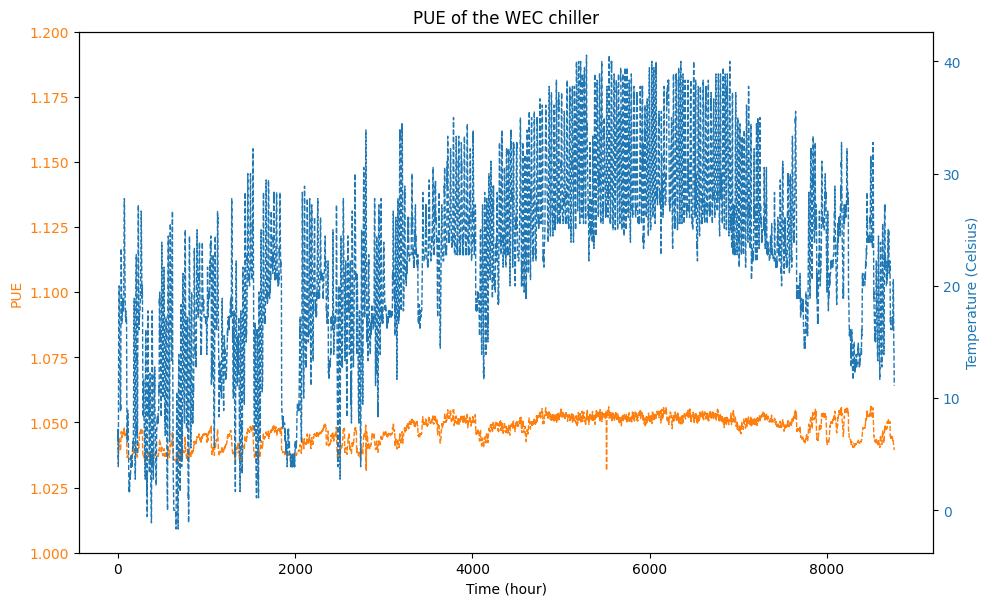

In [36]:
# plot the temperature and PUE
fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'tab:orange'
ax1.set_xlabel('Time (hour)')
ax1.set_ylabel('PUE', color=color)
ax1.plot(PUE_WEC, color=color, linestyle='--', linewidth=1)
ax1.set_ylim([1, 1.2])
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature (Celsius)', color=color)
ax2.plot(temperature_celsius[0:8760], color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('PUE of the WEC chiller')
plt.savefig('PUE_WEC_chiller_with_temperature.png', bbox_inches='tight')